In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

from scipy.linalg import toeplitz

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') 
plt.rcParams.update({'font.size':14})
plt.rcParams["font.family"] = "Times New Roman"

## Column space

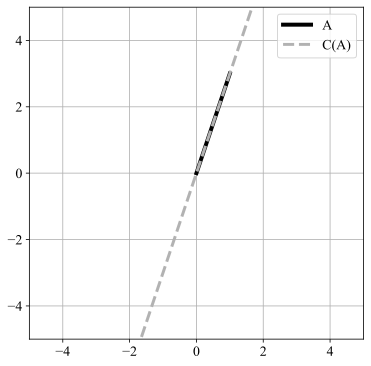

In [3]:
A = np.array([[1], [3]])

xlim = [-5,5]
colspace_p1 = xlim[0]*A
colspace_p2 = xlim[1]*A

plt.figure(figsize=(6,6))

plt.plot([0, A[0,0]], [0, A[1,0]], 'k', linewidth=4, label='A') #ÏõêÏ†êÏóêÏÑú A : (0, 1) ,(0, 3) ÍπåÏßÄ Ïó∞Í≤∞
plt.plot([colspace_p1[0,0], colspace_p2[0,0]], [colspace_p1[1,0], colspace_p2[1,0]], 
         '--', linewidth=3, color=[.7,.7,.7], label='C(A)') #ÏõêÏ†êÏóêÏÑú -5,5Î∞∞Ìïú Ïó¥Í≥µÍ∞Ñ ÏãúÍ∞ÅÌôî

plt.xlim(xlim)
plt.ylim(xlim)
plt.legend()
plt.grid()
plt.savefig('Figure_05_01.png', dpi=600)
plt.show()

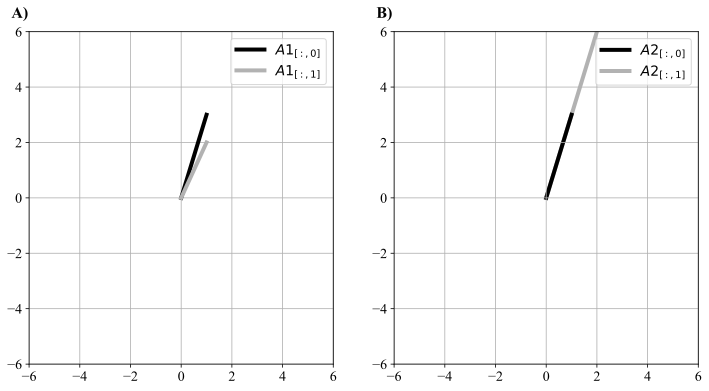

In [4]:
A1 = np.array([[1,1],[3,2]])
A2 = np.array([[1,2],[3,6]])

xlim = [-6,6]
color = [[0,0,0], [.7,.7,.7]]

_, axs = plt.subplots(1,2, figsize=(12,6))

for i in range(2):
    axs[0].plot([0, A1[0,i]], [0, A1[1,i]], color=color[i], linewidth=4)
    axs[1].plot([0, A2[0,i]], [0, A2[1,i]], color=color[i], linewidth=4, zorder=-i) #zorder=-i : Îëê Î≤°ÌÑ∞Í∞Ä Í≤πÏπ† Í≤ΩÏö∞, Ï≤´Î≤àÏß∏ Î≤°ÌÑ∞Î•º ÏúÑÏóê Î≥¥Ïù¥Í≤å Ï°∞Ï†à(Í∞íÏù¥ ÌÅ¥ÏàòÎ°ù ÏúóÏàúÏÑúÎ°ú Ï†ïÎ†¨Îê®)

    axs[i].set_xlim(xlim)
    axs[i].set_ylim(xlim)
    axs[i].grid()
    axs[i].text(xlim[0]-.7, xlim[1]+.5, f'{"AB"[i]})', fontweight='bold', fontsize=16) #f'{"AB"[i]})' : A -> B ÏàúÏúºÎ°ú ÏÑ†ÌÉùÎê®

for i in [0,1]:axs[i].legend([f'$A{i+1}_{{[:,0]}}$', f'$A{i+1}_{{[:,1]}}$'])

plt.savefig('Figure_05_02.png', dpi=600)
plt.show()


# Í≤∞Í≥º Ìï¥ÏÑù
## A : ÏÑ†Ìòï ÎèÖÎ¶Ω, A2 : ÏÑ†Ìòï Ï¢ÖÏÜç

# Now for R3

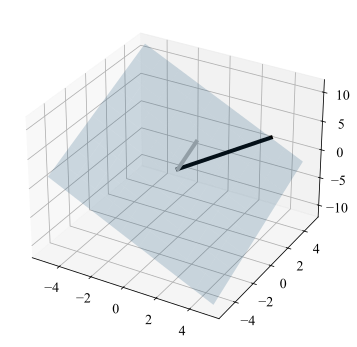

In [5]:
A = np.array([[3,0],
             [5,2],
             [1,2]])

ax = plt.figure(figsize=(6,6)).add_subplot(111, projection='3d')

xx, yy = np.meshgrid(np.linspace(-5,5,10), np.linspace(-5,5,10))
cp = np.cross(A[:,0], A[:,1]) # Îëê Î≤°ÌÑ∞Ïùò Ïô∏Ï†Å Í≥ÑÏÇ∞ -> ÌèâÎ©¥Ïùò Î≤ïÏÑ† Î≤°ÌÑ∞ Íµ¨ÌïòÍ∏∞(ÏàòÏßÅÏù∏ Î≤°ÌÑ∞)
z1 = (-cp[0]*xx - cp[1]*yy)/cp[2] # ÌèâÎ©¥Ïùò Î∞©Ï†ïÏãù(cp[0]*x + cp[1]*y + cp[2]*z = 0) ÏùÑ zÏóê ÎåÄÌï¥ Ï†ïÎ¶¨
ax.plot_surface(xx,yy, z1, alpha=.2)

ax.plot([0, A[0,0]], [0,A[1,0]], [0, A[2,0]], color=color[0], linewidth=4)
ax.plot([0, A[0,1]], [0,A[1,1]], [0, A[2,1]], color=color[1], linewidth=4)

plt.savefig('Figure_05_03.png', dpi=600)
plt.show()

# Null spaces(ÏòÅÍ≥µÍ∞Ñ)
- ÌñâÎ†¨ ùê¥Ïóê ÎåÄÌï¥ ùê¥‚ãÖùë• = 0 ÏùÑ ÎßåÏ°±ÌïòÎäî Î™®Îì† Î≤°ÌÑ∞ ùë•Îì§Ïùò ÏßëÌï©

In [6]:
A = np.array([[1,-1], [-2,2]]) #ÏÑúÎ°ú ÏÑ†Ìòï Ï¢ÖÏÜç -> Í≥ÑÏàò = 1(Ï¶â, Ax=0Ïù¥ ÎêòÎäî Ìï¥Í∞Ä Ï°¥Ïû¨ÌïúÎã§)
B = np.array([[1,-1], [-2,3]]) #ÏÑúÎ°ú ÏÑ†Ìòï ÎèÖÎ¶Ω -> Í≥ÑÏàò = 2(Ï¶â, Ax=0Ïù¥ ÎêòÎäî Ìï¥Îäî 0Î≤°ÌÑ∞Î∞ñÏóê ÏóÜÎã§ = null sapceÎäî Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏùå)

print(scipy.linalg.null_space(A))
print('  ')
print(scipy.linalg.null_space(B))

[[0.70710678]
 [0.70710678]]
  
[]


In [7]:
A[1,0]

np.int64(-2)

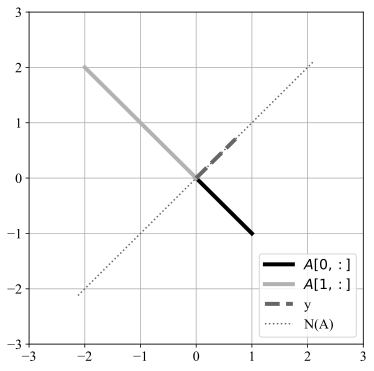

In [8]:
nullvect = scipy.linalg.null_space(A)

xlim = [-3, 3]
color = [[0,0,0], [.7,.7,.7]]

plt.figure(figsize=(6,6))

for i in range(2):
    plt.plot([0, A[i,0]], [0, A[i,1]], color=color[i], linewidth=4, label='$A[{{%g,:}}]$'%i)

plt.plot([0, nullvect[0,0]], [0, nullvect[1,0]], '--', color=[.4,.4,.4], linewidth=4, label='y') #null space ÏßÅÏÑ†

plt.plot([xlim[0]*nullvect[0,0], xlim[1]*nullvect[0,0]],
         [xlim[0]*nullvect[1,0], xlim[1]*nullvect[1,0]],
         ':', color=[.4,.4,.4], label='N(A)') #null spaceÏùò Ï†ÑÏ≤¥ ÏÑ†ÏùÑ Í∏∏Í≤å Í∑∏Î¶º

plt.xlim(xlim)
plt.ylim(xlim)
plt.grid()
plt.legend()

plt.savefig('Figure_05_04.png', dpi=600)
plt.show()

## Exercise 1

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


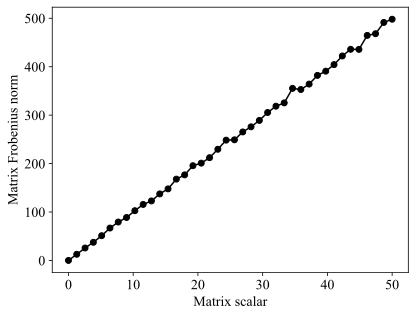

In [9]:
scalingVals = np.linspace(0,50,40)
nExperiments = 10

#initialize output
matrixNorms = np.zeros((len(scalingVals), nExperiments))

for si in range(len(scalingVals)):
    for expi in range(nExperiments):
        R = np.random.randn(10,10) * scalingVals[si]

        matrixNorms[si, expi] = np.linalg.norm(R, 'fro')

plt.plot(scalingVals, np.mean(matrixNorms, axis=1), 'ko-')
plt.xlabel('Matrix scalar')
plt.ylabel('Matrix Frobenius norm')
plt.savefig('Figure_05_07.png', dpi=600)

print(matrixNorms[0, :])

#Í≤∞Í≥º Ìï¥ÏÑù
## ÎÖ∏Î¶ÑÏùÄ Ìï≠ÏÉÅ >= 0 Ïù¥Îã§(0ÌñâÎ†¨Ïù¥ 0)

## Exercise 2

In [10]:
def EuclideanDistance(M1, M2):
    D=M1-M2

    return np.sqrt(np.sum(D**2))

In [11]:
N = 7
A = np.random.randn(N,N)
B = np.random.randn(N,N)

numIters=0
s=1
while EuclideanDistance(s*A, s*B)>1:
    s *= .9
    numIters += 1

print(f'Number of iterations: {numIters-1}')
print(f'Final value of scalar: {s/.9:.3f}')
print(f'Final Euclidean distance: {EuclideanDistance(s/.9*A, s/.9*B):.3f}')

Number of iterations: 22
Final value of scalar: 0.098
Final Euclidean distance: 1.006


Text(0, 0.5, 'Count')

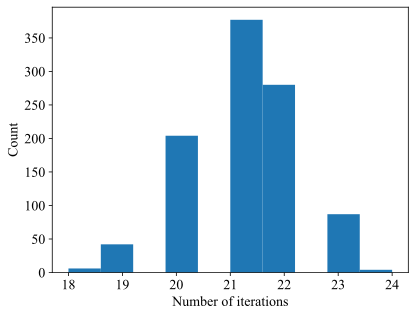

In [12]:
nIters = np.zeros(1000)

for i in range(1000):
    A = np.random.randn(N,N)
    B = np.random.randn(N,N)

    numIters, s = 0,1
    while EuclideanDistance(s*A, s*B)>1:
        s *= .9
        numIters +=1
    nIters[i] = numIters-1

plt.hist(nIters)
plt.xlabel('Number of iterations')
plt.ylabel('Count')

#Í≤∞Í≥º Ìï¥ÏÑù : 20Î≤à Ï†ïÎèÑ Ïä§ÏºÄÏùºÎßÅÏùÑ ÏãúÎèÑÌñàÏùÑ Îïå 1Ïù¥ÌïòÏùò Í±∞Î¶¨Í∞Ä ÎêòÏóàÎã§.

## Exercise 3

In [13]:
M = 50
A = np.random.randn(M, M)

# trace method(ÎåÄÍ∞ÅÌï© Ïó∞ÏÇ∞)
norm1 = np.sqrt(np.sum(np.diag(A.T@A)))

# Euclidean norm method(ÌîÑÎ°úÎ≤†ÎãàÏö∞Ïä§ ÎÖ∏Î¶Ñ)
norm2 = np.sqrt(np.sum(A**2))

norm1-norm2 # Îëê Î∞©ÏãùÏùò Í≤∞Í≥ºÎäî ÏÑúÎ°ú Í∞ôÍ∏∞ ÎïåÎ¨∏Ïóê Í≤∞Í≥ºÍ∞Ä 0

np.float64(0.0)

## Exercise 4

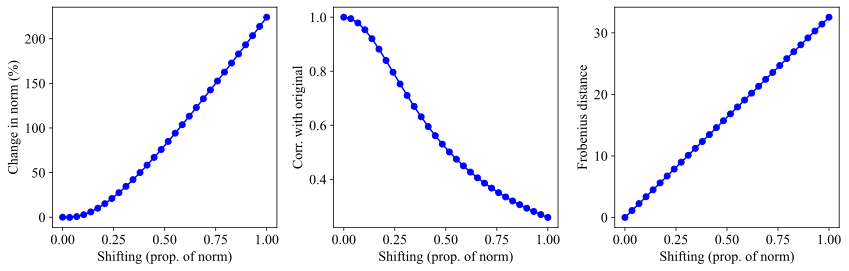

In [14]:
N=10

shifting = np.linspace(0,1,30) #(start, end, num(ÏÉùÏÑ±Ìï† Í∞íÏùò Í∞úÏàò)) : start~end Í∑†Îì±ÌïòÍ≤å ÎÇòÎàà numÍ∞úÏùò Ïã§ÏàòÎ•º Í∞ñÎäî 1Ï∞®Ïõê Î∞∞Ïó¥

A = np.random.randn(N,N)
normA = np.linalg.norm(A, 'fro') #fro : frobenius normÏùÑ Í≥ÑÏÇ∞

shiftingResults = np.zeros((len(shifting), 3)) #(30,3)
resultsNames = ['Change in norm (%)', 'Corr. with original', 'Frobenius distance'] # AÏùò ÌÅ¨Í∏∞ Î≥ÄÌôî, AÏôÄ AsÏùò ÏÉÅÍ¥ÄÍ≥ÑÏàò, AÏôÄ As ÏÇ¨Ïù¥Ïùò Í±∞Î¶¨(ÏàòÏπòÏ†Å Ï∞®Ïù¥)

for si in range(len(shifting)):
    As = A + shifting[si]*normA*np.eye(N) # AÏóê Ìï≠Îì±ÌñâÎ†¨(np.eye)ÏùÑ Í≥±Ìïú Ìï≠ÏùÑ ÎçîÌï®ÏúºÎ°úÏç® AÎ•º Î≥ÄÌòï(Ïù¥Îèô)ÏãúÌÇ¥

    normShift = np.linalg.norm(As, 'fro')
    shiftingResults[si,0] = 100*(normShift-normA)/normA # AÏóêÏÑú ÏñºÎßàÎÇò ÌÅ¨Í∏∞(ÎÖ∏Î¶Ñ)Í∞Ä Î≥ÄÌñàÎäîÏßÄ Î∞±Î∂ÑÏú®Î°ú Ï†ÄÏû•
    
    # compute correlation
    shiftingResults[si,1] = np.corrcoef(A.flatten(), As.flatten())[0,1] # AÏôÄ AsÎ•º 1Ï∞®ÏõêÏúºÎ°ú ÌéºÏ≥êÏÑú ÏÉÅÍ¥ÄÍ≥ÑÏàò Í≥ÑÏÇ∞(Íµ¨Ï°∞Í∞Ä ÏñºÎßàÎÇò ÎπÑÏä∑ÌïúÏßÄ ÌôïÏù∏)
    
    # Frobenius distance
    shiftingResults[si,2] = EuclideanDistance(A, As) #AÏôÄ As ÏÇ¨Ïù¥Ïùò Frobenius Í±∞Î¶¨(Ï∞®Ïù¥ Ï†ïÎèÑ) Í≥ÑÏÇ∞

_, axs = plt.subplots(1,3,figsize=(12,4))

for i in range(3):
    axs[i].plot(shifting, shiftingResults[:,i], 'bo-')
    axs[i].set_xlabel('Shifting (prop. of norm)') #Ïù¥Îèô(ÎÖ∏Î¶Ñ ÎπÑÏú®)
    axs[i].set_ylabel(resultsNames[i])

plt.tight_layout()
plt.savefig('Figure_05_06.png', dpi=600)
plt.show()

#Í≤∞Í≥º Ìï¥ÏÑù
## 01 : Ï†ÑÏ≤¥ ÌÅ¨Í∏∞ Î≥ÄÌôî -> shifting ÎπÑÏú®Ïù¥ Ï¶ùÍ∞ÄÌï†ÏàòÎ°ù ÌñâÎ†¨Ïùò ÌÅ¨Í∏∞(norm)ÎèÑ Ïª§Ïßê
## 02 : Íµ¨Ï°∞Ï†Å Ïú†ÏÇ¨ÎèÑ -> shifting ÎπÑÏú®Ïù¥ Ï¶ùÍ∞ÄÌï†ÏàòÎ°ù AsÎäî AÏóêÏÑú ÎåÄÍ∞Å ÏÑ±Î∂ÑÎßå Ï†êÏ†ê Ïª§ÏßÑ ÌñâÎ†¨Ïù¥ ÎêòÎØÄÎ°ú Íµ¨Ï°∞Í∞Ä Ï†êÏ†ê Îã¨ÎùºÏßê -> ÏÉÅÍ¥ÄÍ≥ÑÏàò Í∞êÏÜå
## 03 : ÏàòÏπòÏ†Å Ï∞®Ïù¥ -> shifting ÎπÑÏú®Ïù¥ Ï¶ùÍ∞ÄÌï†ÏàòÎ°ù AÏôÄ AsÏÇ¨Ïù¥Ïùò Í±∞Î¶¨(Ï∞®Ïù¥)ÎèÑ Ïª§Ïßê

## Exercise 5

In [15]:
M = 5
N = 8
r = 3

A = np.random.randn(M,r) @ np.random.randn(r, N)

print(A.shape)
print(np.linalg.matrix_rank(A))
print('\n')
print(A)

(5, 8)
3


[[-1.47813538 -0.36647635 -0.96109593 -0.39545942  0.30319502  1.58625255
   1.32121825  0.31785254]
 [-4.56509722 -5.54600593 -5.00232894 -1.74549576  5.03928138  4.10366476
   1.64012456 -0.44165563]
 [ 1.40375211  6.56889549  1.82851908 -0.32156526 -4.64031816  0.50356105
   1.40928575  2.16885797]
 [-1.20626678 -0.32734943 -1.65436961 -0.95685162  0.90183844  1.68000507
   0.72204604  0.45448641]
 [ 4.31416944  0.21761398 -0.04868022 -0.75841121  1.71085648 -3.6615055
  -5.30514965 -0.61596246]]


## Exercise 6

In [16]:
# summed matrix has rank-0

A = np.diag([1,0,0,0,0])
B = np.diag([-1,0,0,0,0])
C = A+B

np.linalg.matrix_rank(A), np.linalg.matrix_rank(B), np.linalg.matrix_rank(C)

# Í≤∞Í≥º Ìï¥ÏÑù
## A, BÎäî ÏÑúÎ°ú Í≥ÑÏàòÍ∞Ä 1Ïù∏Îç∞ AÏóê -1ÏùÑ Í≥±ÌïòÎ©¥ BÍ∞Ä ÎêòÎØÄÎ°ú CÎäî Í≥ÑÏàòÍ∞Ä 0Ïù¥Îã§. 
## Îî∞ÎùºÏÑú, r(A+B) <= r(A) + r(B) ÏÑ±Î¶Ω

(np.int64(1), np.int64(1), np.int64(0))

In [17]:
# summed matrix has rank-1

A = np.diag([1,0,0,0,0])
B = np.zeros(A.shape) # (5,5)
B[0,1] = 10
C = A+B

np.linalg.matrix_rank(A), np.linalg.matrix_rank(B), np.linalg.matrix_rank(C)

# Í≤∞Í≥º Ìï¥ÏÑù
## A, BÎäî ÏÑúÎ°ú Í≥ÑÏàòÍ∞Ä 1Ïù¥Í≥†, CÎäî A+BÏóêÏÑú Ï≤´ÌñâÏù¥ [1,10,0,0,0]Ïù¥Í≥† ÎÇòÎ®∏ÏßÄÍ∞Ä 0Ïù¥ÎØÄÎ°ú Í≥ÑÏàòÍ∞Ä 1Ïù¥Îã§. 
## Îî∞ÎùºÏÑú, r(A+B) <= r(A) + r(B) ÏÑ±Î¶Ω

(np.int64(1), np.int64(1), np.int64(1))

In [18]:
# summed matrix has rank-2

A = np.diag([1,0,0,0,0])
B = np.diag([0,1,0,0,0])
C = A+B

np.linalg.matrix_rank(A), np.linalg.matrix_rank(B), np.linalg.matrix_rank(C)

# Í≤∞Í≥º Ìï¥ÏÑù
## A, BÎäî ÏÑúÎ°ú Í≥ÑÏàòÍ∞Ä 1Ïù¥Í≥†, CÎäî A+BÏóêÏÑú Ï≤´ÌñâÏù¥ [1,0,0,0,0]Ïù¥Í≥† ÎëêÎ≤àÏß∏ ÌñâÏù¥ [0,1,0,0,0]Ïù¥Í≥† ÎÇòÎ®∏ÏßÄÍ∞Ä 0Ïù¥ÎØÄÎ°ú Í≥ÑÏàòÍ∞Ä 2Ïù¥Îã§. 
## Îî∞ÎùºÏÑú, r(A+B) <= r(A) + r(B) ÏÑ±Î¶Ω

(np.int64(1), np.int64(1), np.int64(2))

In [19]:
# random matrices have maximum possible rank!

A = np.random.randn(5,1) @ np.random.randn(1,5) #Ïô∏Ï†Å(Î™®Îì† ÌñâÏù¥ ÌïòÎÇòÏùò Î∞©Ìñ•ÏÑ±Îßå ÏûàÏùå=1Ï∞®Ïõê) -> Ï¶â, A = u@v.T ÌòïÌÉúÎ°ú, ÌïòÎÇòÏùò Î≤°ÌÑ∞ uÎ•º vÏùò Í∞Å ÏÑ±Î∂ÑÏúºÎ°ú scaleÌïú Í≤É = Î™®Îì† Ìñâ/Ïó¥Ïù¥ ÏÑúÎ°ú ÏÑ†Ìòï Ï¢ÖÏÜç = Í≥ÑÏàò 1
B = np.random.randn(5,1) @ np.random.randn(1,5)
C = A+B

np.linalg.matrix_rank(A), np.linalg.matrix_rank(B), np.linalg.matrix_rank(C)

# Í≤∞Í≥º Ìï¥ÏÑù
## A, BÎäî ÏÑúÎ°ú Í≥ÑÏàòÍ∞Ä 1Ïù¥Í≥†, CÎäî A+BÏù¥ÎØÄÎ°ú 1+1ÏùÑ ÌïòÏó¨ Í≥ÑÏàòÍ∞Ä 2Ïù¥Îã§. 
## Îî∞ÎùºÏÑú, r(A+B) <= r(A) + r(B) ÏÑ±Î¶Ω

(np.int64(1), np.int64(1), np.int64(2))

## Exercise 7

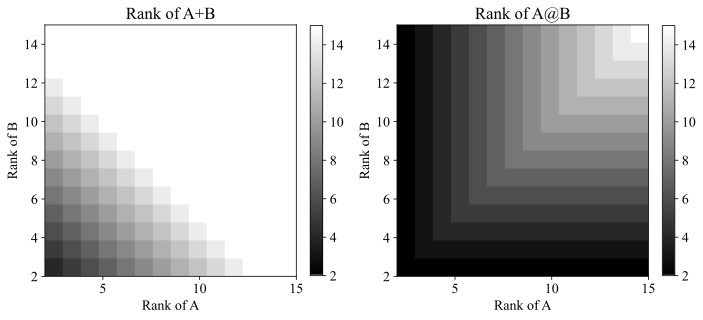

In [20]:
def makeAmatrix(M, r):
    return np.random.randn(M, r) @ np.random.randn(r, M)

matSize = 20 # matrix size
rs = range(2, 16) #range of ranks

# initialize results matrix
Ranks = np.zeros((len(rs), len(rs), 2)) #(14,14,2)

for i in range(len(rs)):
    for j in range(len(rs)):

        S = makeAmatrix(matSize, rs[i]) + makeAmatrix(matSize, rs[j]) # sum
        M = makeAmatrix(matSize, rs[i]) @ makeAmatrix(matSize, rs[j]) # dot product

        # compute their ranks
        Ranks[i, j, 0] = np.linalg.matrix_rank(S)
        Ranks[i, j, 1] = np.linalg.matrix_rank(M)

fig, axs = plt.subplots(1,2, figsize=(10,6))
s = '+@' #symbols for title(sum, dot product)

for i in range(2):

    h = axs[i].imshow(Ranks[:,:,i], vmin=np.min(rs), vmax=np.max(rs), origin='lower',
                      extent=(rs[0], rs[-1], rs[0], rs[-1]), cmap='gray')
    
    fig.colorbar(h, ax=axs[i], fraction=.045)
    axs[i].set_xlabel('Rank of A')
    axs[i].set_ylabel('Rank of B')
    axs[i].set_title(f'Rank of A{s[i]}B')


plt.savefig('Figure_05_09.png', dpi=600)
plt.tight_layout()
plt.show()

# Í≤∞Í≥º Ìï¥ÏÑù
## A+B -> A,B Í∞ÅÍ∞ÅÏùò Îû≠ÌÅ¨Í∞íÏù¥ Ïª§ÏßàÏàòÎ°ù A+BÏùò Îû≠ÌÅ¨ÎèÑ Ïª§ÏßÑÎã§. Îã®, 20*20 ÌñâÎ†¨Ïù¥ÎØÄÎ°ú 20ÏùÑ ÎÑòÏßÄÎäî ÏïäÏùå
## A@B -> rank(A,B) <= min(rank(A), rank(B))Ïù¥ÎØÄÎ°ú, Ìï≠ÏÉÅ ÏûëÏùÄ Îû≠ÌÅ¨Ïóê ÏùòÌï¥ ÏµúÏ¢Ö Îû≠ÌÅ¨Í∞Ä Í≤∞Ï†ïÎê® -> A,BÏùò Îû≠ÌÅ¨Í∞Ä ÎèôÏùºÌïú ÎåÄÍ∞ÅÏÑ†ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Ï†êÏ†ê ÏÉâÏù¥ Î∞ùÏïÑÏßê, Îû≠ÌÅ¨Í∞Ä ÏûëÏùÄ Ï™ΩÏùò ÏÉâÏÉÅÏúºÎ°ú ÎßûÏ∂∞Ïßê
### ex. rank(A) = 12 , rank(B) = 14 -> rank(A)Ïùò Í∞íÏù¥ Îçî ÏûëÏúºÎØÄÎ°ú Ìï¥Îãπ ÍµêÏ†ê(12,14)Îäî 12 ÏÉâÏÉÅÏûÑ 

## Exercise 8

In [21]:
M = 15
N = 8
r = 4

A = np.random.randn(M,r) @ np.random.randn(r,N)
At = A.T
AtA = A.T@A
AAt = A@A.T

print(
    np.linalg.matrix_rank(A),
    np.linalg.matrix_rank(At),
    np.linalg.matrix_rank(AtA),
    np.linalg.matrix_rank(AAt)
)

4 4 4 4


## Exercise 9

In [22]:
def is_V_inColA(A,v): #vÍ∞Ä AÏùò Ïó¥Î°ú ÏÉùÏÑ±Ìï† Ïàò ÏûàÎäîÏßÄ(ÏÑ†Ìòï Í≤∞Ìï©ÏúºÎ°ú ÌëúÌòÑ Í∞ÄÎä•ÌïúÏßÄ ÌôïÏù∏)
    
    # Ï∞®Ïõê Ï≤¥ÌÅ¨(vÏùò Í∏∏Ïù¥ÏôÄ AÏùò Ìñâ ÏàòÍ∞Ä Í∞ôÏïÑÏïº Ìï® => Ï¶â, Í∞ôÏùÄ Í≥µÍ∞ÑÏóê ÏûàÏñ¥Ïïº ÎπÑÍµê Í∞ÄÎä•)
    if A.shape[0]!=v.shape[0]:
        raise Exception('Size mismatch! A and v must have the same column dimensionality!')
    
    rankA = np.linalg.matrix_rank(A)
    rankAv = np.linalg.matrix_rank(np.hstack((A,v))) # Ïò§Î•∏Ï™ΩÏúºÎ°ú Ï∂îÍ∞Ä(ÌôïÏû• ÌñâÎ†¨)

    return rankA == rankAv # vÍ∞Ä C(A) Ïù¥Î©¥ T ÏïÑÎãàÎ©¥ F Ï∂úÎ†•

A = np.random.randn(4,3)
v = np.random.randn(4,1)

is_V_inColA(A,v) 

# Í≤∞Í≥º Ìï¥ÏÑù
## AÏùò 3Í∞úÏùò Ïó¥Î°ú vÎ•º ÎßåÎì§ Ïàò ÏûàÎäîÏßÄ Í≤ÄÏÇ¨ -> ÎåÄÎ∂ÄÎ∂Ñ False (ÎûúÎç§Ïù¥ÎØÄÎ°ú ÎèÖÎ¶ΩÏ†ÅÏùº Í∞ÄÎä•ÏÑ±Ïù¥ ÎÜíÎã§)

np.False_

## Exercise 10

[[-5.78974370e-01 -5.78974370e-01  1.16778126e+00 -1.72881230e+00
   8.34069371e-02 -9.17970178e-02 -1.30156742e-01 -4.77824627e-01
   1.87720893e-01 -7.51163962e-01 -1.92343755e+00  3.06426567e-01
  -2.15410355e-01 -1.07545333e-01 -1.33561085e+00 -1.72309556e+00
   1.76693678e+00 -9.87499845e-02  1.96652423e+00  2.87048127e-01
   2.82505396e-01  1.70549815e-01 -1.50733024e-01 -8.52124173e-02
   1.74227071e+00 -4.58089586e-01 -2.28839740e-01 -1.91760203e-01
  -7.67098883e-01 -6.41957954e-01]
 [-1.38110557e+00 -1.38110557e+00  2.15325078e-01  3.65548083e-01
   7.57210292e-01 -8.76926902e-01  4.43133452e-01  1.00549580e-01
   5.72696819e-01 -7.66553283e-02  1.10630785e+00 -4.43244456e-01
   5.71221947e-01  9.68301605e-01 -1.32543329e+00  2.47079218e-01
   5.95522721e-01 -5.36913206e-01 -8.58105724e-01 -1.04549162e+00
  -5.53486197e-01 -9.70696362e-01  8.90757059e-01 -1.40212399e+00
   8.68971994e-01 -8.02749258e-01  5.31868366e-01 -6.06116652e-01
   7.99263267e-01  7.31580911e-01]
 [-9.5

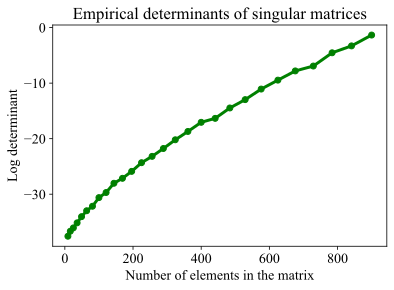

In [23]:
ns = np.arange(3,31) #28Í∞ú

iters=100

dets=np.zeros((len(ns), iters)) # 28*100

for ni in range(len(ns)): #28
    for i in range(iters):

        A = np.random.randn(ns[ni], ns[ni])
        A[:,0] = A[:,1] #Ï≤´Î≤àÏß∏ Ïó¥ = ÎëêÎ≤àÏß∏ Ïó¥(ÏôÑÏ†Ñ ÏÑ†Ìòï Ï¢ÖÏÜç) -> Ï∂ïÏÜå ÌñâÎ†¨(ÌäπÏù¥ ÌñâÎ†¨)Ïù¥ÎØÄÎ°ú ÌñâÎ†¨ÏãùÏùÄ 0Ïù¥Í±∞ÎÇò 0Ïóê Í∞ÄÍπùÎã§.
        dets[ni,i] = np.abs(np.linalg.det(A))

print(A) #Ï≤´Î≤àÏß∏Ïó¥Í≥º ÎëêÎ≤àÏß∏Ïó¥Ïù¥ ÎèôÏùºÌï®
print('\n')

plt.figure(figsize=(6,4))
plt.plot(ns**2, np.log(np.mean(dets, axis=1)), 'go-', linewidth=3) #ÌñâÎ†¨ÏãùÏùÄ Îß§Ïö∞ ÏûëÏùÄ Í∞íÏùÑ Í∞ÄÏßà Ïàò ÏûàÏúºÎØÄÎ°ú logÎ•º Ï∑®Ìï¥ÏÑú Í∞íÏùÑ ÌôïÏû•ÏãúÌÇ¥
plt.xlabel('Number of elements in the matrix')
plt.ylabel('Log determinant')
plt.title('Empirical determinants of singular matrices') #ÌäπÏù¥ ÌñâÎ†¨Ïùò Ïã§ÌóòÏ†Å ÌñâÎ†¨Ïãù
plt.savefig('Figure_05_10.png', dpi=600)
plt.show()

# Í≤∞Í≥º Ìï¥ÏÑù
## Î™©Ï†Å : ÏÑúÎ°ú ÏÑ†Ìòï Ï¢ÖÏÜçÎêú Ïó¥ÏùÑ Í∞ÄÏßÑ ÌäπÏù¥ÌñâÎ†¨ AÏùò ÌñâÎ†¨Ïãù Í∞íÏù¥ ÌñâÎ†¨Ïùò ÌÅ¨Í∏∞Í∞Ä Ïª§ÏßàÏàòÎ°ù Ïñ¥Îñ§ Í≤ΩÌñ•ÏùÑ Î≥¥Ïù¥ÎäîÏßÄ ÌôïÏù∏
## Í≤∞Í≥º : ÌñâÎ†¨Ïùò ÌÅ¨Í∏∞Í∞Ä Ïª§ÏßàÏàòÎ°ù ÌñâÎ†¨ÏãùÏù¥ ÏûëÏïÑÏßê(logÍ∞íÏù¥ 0Ïóê Í∞ÄÍπåÏõåÏßê) - ÌñâÎ†¨Ïùò ÌÅ¨Í∏∞Í∞Ä Ïª§ÏßàÏàòÎ°ù -> ÏÑ†Ìòï Ï¢ÖÏÜçÏ†ÅÏù∏ Ïó¥Ïù¥ ÎßéÏïÑÏßÄÎØÄÎ°ú 0Ïóê Í∞ÄÍπåÏõåÏßÑÎã§.